In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from wordcloud import WordCloud
import numpy as np
from copy import copy
import requests
from io import StringIO

In [106]:
# Chargement des données
df = pd.read_csv("stackoverflow_full.csv")

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [108]:
df.head()

Unnamed: 0  Age Accessibility        EdLevel  Employment Gender  \
0           0  <35            No         Master           1    Man   
1           1  <35            No  Undergraduate           1    Man   
2           2  <35            No         Master           1    Man   
3           3  <35            No  Undergraduate           1    Man   
4           4  >35            No            PhD           0    Man   

  MentalHealth MainBranch  YearsCode  YearsCodePro    Country  PreviousSalary  \
0           No        Dev          7             4     Sweden         51552.0   
1           No        Dev         12             5      Spain         46482.0   
2           No        Dev         15             6    Germany         77290.0   
3           No        Dev          9             6     Canada         46135.0   
4           No     NotDev         40            30  Singapore        160932.0   

                                      HaveWorkedWith  ComputerSkills  Employed  
0                          C++;Python;Git;PostgreSQL               4         0  
1  Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...              12         1  
2             C;C++;Java;Perl;Ruby;Git;Ruby on Rails               7         0  
3  Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...              13         0  
4                                         C++;Python               2         0

In [109]:
# Recodage des variables catégorielles (ENG -> FR)

df_fr = df.copy()

df_fr["EmployedCat"] = pd.cut(df_fr["Employed"], bins=[-1, 0, 1], labels=["Sans emploi", "En emploi"]).astype("object")

df_fr["Age"] = df_fr["Age"].replace(
    ["<35", ">35"],
    ["Moins de 35 ans", "Plus de 35 ans"]
)

df_fr["Accessibility"] = df_fr["Accessibility"].replace(
    ["No", "Yes"],
    ["Non", "Oui"]
)

df_fr["EdLevel"] = df_fr["EdLevel"].replace(
    ["NoHigherEd", "Undergraduate", "Master", "PhD", "Other"],
    ["Pas d'éducation supérieure", "Licence", "Master", "Doctorat", "Autre"]
)

df_fr["Gender"] = df_fr["Gender"].replace(
    ["Man", "Woman", "NonBinary"],
    ["Homme", "Femme", "Non-Binaire"]
)

df_fr["MentalHealth"] = df_fr["MentalHealth"].replace(
    ["No", "Yes"],
    ["Non", "Oui"]
)

df_fr["MainBranch"] = df_fr["MainBranch"].replace(
    ["Dev", "NotDev"],
    ["Développement", "Autre"]
)

In [110]:
df_fr.head()

Unnamed: 0              Age Accessibility   EdLevel  Employment Gender  \
0           0  Moins de 35 ans           Non    Master           1  Homme   
1           1  Moins de 35 ans           Non   Licence           1  Homme   
2           2  Moins de 35 ans           Non    Master           1  Homme   
3           3  Moins de 35 ans           Non   Licence           1  Homme   
4           4   Plus de 35 ans           Non  Doctorat           0  Homme   

  MentalHealth     MainBranch  YearsCode  YearsCodePro    Country  \
0          Non  Développement          7             4     Sweden   
1          Non  Développement         12             5      Spain   
2          Non  Développement         15             6    Germany   
3          Non  Développement          9             6     Canada   
4          Non          Autre         40            30  Singapore   

   PreviousSalary                                     HaveWorkedWith  \
0         51552.0                          C++;Python;Git;PostgreSQL   
1         46482.0  Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...   
2         77290.0             C;C++;Java;Perl;Ruby;Git;Ruby on Rails   
3         46135.0  Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...   
4        160932.0                                         C++;Python   

   ComputerSkills  Employed  EmployedCat  
0               4         0  Sans emploi  
1              12         1    En emploi  
2               7         0  Sans emploi  
3              13         0  Sans emploi  
4               2         0  Sans emploi

In [111]:
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
 15  EmployedCat     73462 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 9.0+ MB


In [112]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [113]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [114]:
from IPython.display import HTML #pour afficher les graphs
# dans une cellule de notebook

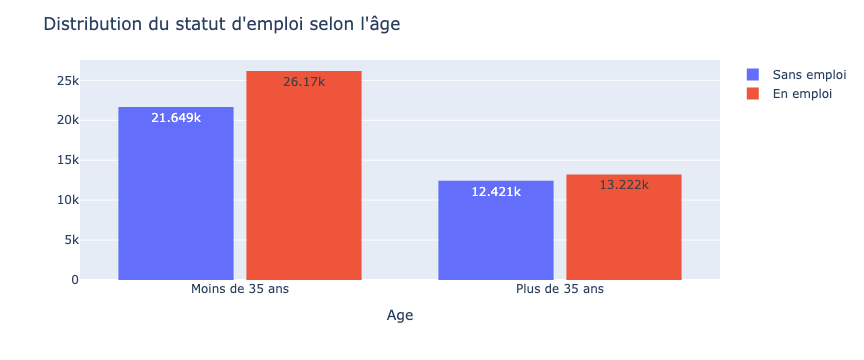

In [115]:
# Histogramme Age
fig = px.histogram(df_fr, x="Age", color = "EmployedCat", barmode="group", text_auto = True)

fig.update_layout(
    title_text="Distribution du statut d'emploi selon l'âge",
    xaxis_title_text='Age', 
    yaxis_title_text="",
    legend_title_text = "",
    bargap=0.2, 
    bargroupgap=0.1 
)

fig.show()
#fig.to_dict()

In [120]:
# Pourcentages Age
grouped_df = df_fr.groupby(['Age', 'EmployedCat']).size().reset_index(name='count')
total_counts = df_fr.groupby('EmployedCat').size()

grouped_df['percentage'] = (grouped_df['count'] / grouped_df['EmployedCat'].map(total_counts) * 100).round(1)

print(grouped_df)

               Age  EmployedCat  count  percentage
0  Moins de 35 ans    En emploi  26170        66.4
1  Moins de 35 ans  Sans emploi  21649        63.5
2   Plus de 35 ans    En emploi  13222        33.6
3   Plus de 35 ans  Sans emploi  12421        36.5


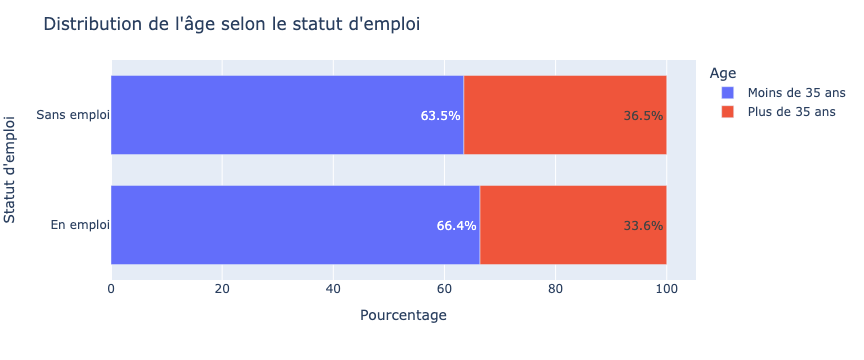

In [121]:
# Graphe Pourcentages Age
fig = px.bar(grouped_df, orientation = 'h', x="percentage", y = "EmployedCat", color = "Age", text_auto = True)

fig.update_layout(
    title_text="Distribution de l'âge selon le statut d'emploi",
    xaxis_title_text="Pourcentage", 
    yaxis_title_text="Statut d'emploi",
    legend_title_text = "Age",
    bargap=0.2, 
    bargroupgap=0.1 
)

fig.update_traces(texttemplate = '%{x}%')

fig.show()
#fig.to_dict()

In [122]:
# Pourcentages Age BIS
grouped_df = df_fr.groupby(['Age', 'EmployedCat']).size().reset_index(name='count')
total_counts = df_fr.groupby('Age').size()

grouped_df['percentage'] = (grouped_df['count'] / grouped_df['Age'].map(total_counts) * 100).round(1)

print(grouped_df)

               Age  EmployedCat  count  percentage
0  Moins de 35 ans    En emploi  26170        54.7
1  Moins de 35 ans  Sans emploi  21649        45.3
2   Plus de 35 ans    En emploi  13222        51.6
3   Plus de 35 ans  Sans emploi  12421        48.4


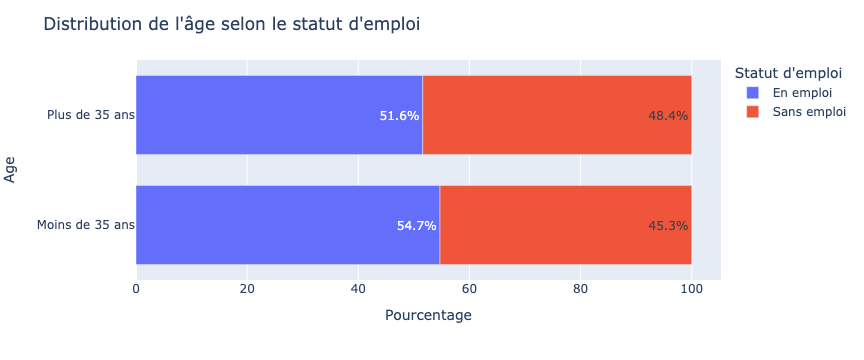

In [123]:
# Graphe Pourcentages Age BIS
fig = px.bar(grouped_df, orientation = 'h', x="percentage", y = "Age", color = "EmployedCat", text_auto = True)

fig.update_layout(
    title_text="Distribution de l'âge selon le statut d'emploi",
    xaxis_title_text="Pourcentage", 
    yaxis_title_text="Age",
    legend_title_text = "Statut d'emploi",
    bargap=0.2, 
    bargroupgap=0.1 
)

fig.update_traces(texttemplate = '%{x}%')

fig.show()
#fig.to_dict()

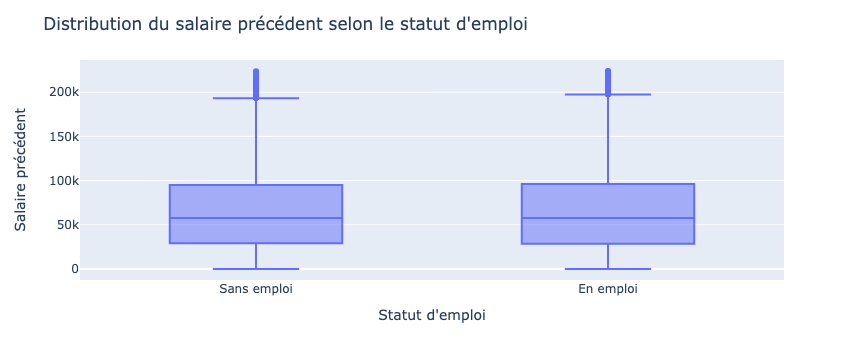

In [103]:
# Boxplot Salaire
fig = px.box(df_fr, x="EmployedCat", y = "PreviousSalary")

fig.update_layout(
    title_text="Distribution du salaire précédent selon le statut d'emploi",
    xaxis_title_text="Statut d'emploi", 
    yaxis_title_text="Salaire précédent",
    bargap=0.2, 
    bargroupgap=0.1 
)

fig.show()
#fig.to_dict()

In [130]:
# Carte : nombre de répondants par pays

df_carto = df_fr.groupby('Country')['Employed'].agg(['count', 'mean']).reset_index()
df_carto.columns = ['Country', 'count', 'percentage']
df_carto['percentage'] *= 100

print(df_carto)

## IL FAUT AJOUTER UNE COLONNE "iso" CONTENANT LES CODES ISO (3 LETTRES) DES PAYS

                                  Country  count  percentage
0                             Afghanistan     17   58.823529
1                                 Albania     59   66.101695
2                                 Algeria     19   42.105263
3                                 Andorra     11   63.636364
4                                  Angola      8   62.500000
..                                    ...    ...         ...
167  Venezuela, Bolivarian Republic of...    118   57.627119
168                              Viet Nam    210   57.142857
169                                 Yemen      9   44.444444
170                                Zambia     13   61.538462
171                              Zimbabwe     19   57.894737

[172 rows x 3 columns]


In [ ]:
# Carte du nb de développeurs
fig = px.choropleth(df_carto, locations="iso",
                    color="count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [ ]:
# Carte du taux d'emploi
fig = px.choropleth(df_carto, locations="iso",
                    color="percentage",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()